# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
Made by: Srinivas Dengle

#### Problem Statement:
Triage is the prioritization of patient care (or victims during a disaster) based on illness/injury, symptoms, severity, prognosis, and resource availability. The purpose of triage is to identify patients needing immediate resuscitation, to help assign patients to a predesignated patient care area, and to initiate diagnostic/therapeutic measures as appropriate. Your job as a data scientist is to cluster the patients according to their symptoms and identify the level of urgency for each group; it is important to identify all patients needing immediate resuscitation.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score

# 1. Data

# 1A.

In [3]:
# loading the patient priority csv
df = pd.read_csv("patient_priority.csv")
df.head()

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0           0  40.0     1.0              2.0           140.0        294.0   
1           1  49.0     0.0              3.0           160.0        180.0   
2           2  37.0     1.0              2.0           130.0        294.0   
3           3  48.0     0.0              4.0           138.0        214.0   
4           4  54.0     1.0              3.0           150.0        195.0   

   max heart rate  exercise angina  plasma glucose  skin_thickness  insulin  \
0           172.0              0.0           108.0            43.0     92.0   
1           156.0              0.0            75.0            47.0     90.0   
2           156.0              0.0            98.0            53.0    102.0   
3           156.0              1.0            72.0            51.0    118.0   
4           156.0              0.0           108.0            90.0     83.0   

    bmi  diabetes_pedigree  hypertension  heart_disease Residence_type  \
0  19.0           0.467386           0.0            0.0          Urban   
1  18.0           0.467386           0.0            0.0          Urban   
2  23.0           0.467386           0.0            0.0          Urban   
3  18.0           0.467386           0.0            0.0          Urban   
4  21.0           0.467386           0.0            0.0          Urban   

  smoking_status  triage  
0   never smoked  yellow  
1   never smoked  orange  
2   never smoked  yellow  
3   never smoked  orange  
4   never smoked  yellow

In [4]:
# checking the dimension of the dataset
df.shape

(6962, 18)

In [5]:
# dropping triage and unnamed column
df.drop(["triage", "Unnamed: 0"], axis=1, inplace=True)
df.head()

age  gender  chest pain type  blood pressure  cholesterol  max heart rate  \
0  40.0     1.0              2.0           140.0        294.0           172.0   
1  49.0     0.0              3.0           160.0        180.0           156.0   
2  37.0     1.0              2.0           130.0        294.0           156.0   
3  48.0     0.0              4.0           138.0        214.0           156.0   
4  54.0     1.0              3.0           150.0        195.0           156.0   

   exercise angina  plasma glucose  skin_thickness  insulin   bmi  \
0              0.0           108.0            43.0     92.0  19.0   
1              0.0            75.0            47.0     90.0  18.0   
2              0.0            98.0            53.0    102.0  23.0   
3              1.0            72.0            51.0    118.0  18.0   
4              0.0           108.0            90.0     83.0  21.0   

   diabetes_pedigree  hypertension  heart_disease Residence_type  \
0           0.467386           0.0            0.0          Urban   
1           0.467386           0.0            0.0          Urban   
2           0.467386           0.0            0.0          Urban   
3           0.467386           0.0            0.0          Urban   
4           0.467386           0.0            0.0          Urban   

  smoking_status  
0   never smoked  
1   never smoked  
2   never smoked  
3   never smoked  
4   never smoked

### Columns expalanation

age - the age of the patient<br>
gender - patients gender, either male or female<br>
chest pain type - Type of chest pain 0,1,2,3,4, 4 being the highest type of chest pain.<br>
blood pressure - Blood pressure measurement <br>
cholesterol - Cholestrol level in the blood<br>
max heart rate - Max heart rate of the patient<br>
exercise angina -   Exercise-induced angina<br>
plasma glucose - Plasma glucose level in the blood<br>
skin_thickness - The thickness of the patients skin <br>
insulin - Insulin levels in the patients blood<br>
bmi - A measure of body fat based on height and weight. Body mass index. <br>
diabetes_pedigree - A measure of genetic predisposition to diabetes.<br>
hypertension - Hypertension status. 0,1<br>
heart_disease - If a person has a heart disease. 0,1<br>
Residence_type - Whether a person is living in an urban setting or the suburbs <br>
smoking_status - Whether a person smokes or not. Never smoked, smokes, formerly smoked, unknown.

In [6]:
# using describe function to summarize the dataset
df.describe().T

count        mean        std      min         25%  \
age                6962.0   57.450014  11.904948   28.000   48.000000   
gender             6961.0    0.531964   0.499013    0.000    0.000000   
chest pain type    6962.0    0.529015   1.253791    0.000    0.000000   
blood pressure     6962.0  109.629991  21.534852   60.000   92.000000   
cholesterol        6962.0  184.711290  32.010359  150.000  164.000000   
max heart rate     6962.0  163.502442  15.458693  138.000  150.000000   
exercise angina    6962.0    0.061764   0.240743    0.000    0.000000   
plasma glucose     6962.0   98.394283  28.598084   55.120   78.707500   
skin_thickness     6962.0   56.813416  22.889316   21.000   36.000000   
insulin            6962.0  111.091640  17.470033   81.000   97.000000   
bmi                6962.0   27.190908   7.362886   10.300   21.800000   
diabetes_pedigree  6962.0    0.467386   0.102663    0.078    0.467386   
hypertension       6962.0    0.071531   0.257729    0.000    0.000000   
heart_disease      6962.0    0.039500   0.194796    0.000    0.000000   

                          50%         75%     max  
age                 56.000000   66.000000   82.00  
gender               1.000000    1.000000    1.00  
chest pain type      0.000000    0.000000    4.00  
blood pressure     111.000000  127.000000  165.00  
cholesterol        179.000000  192.000000  294.00  
max heart rate     163.000000  177.000000  202.00  
exercise angina      0.000000    0.000000    1.00  
plasma glucose      93.000000  111.632500  199.00  
skin_thickness      55.000000   77.000000   99.00  
insulin            111.000000  125.000000  171.00  
bmi                 26.200000   31.000000   66.80  
diabetes_pedigree    0.467386    0.467386    2.42  
hypertension         0.000000    0.000000    1.00  
heart_disease        0.000000    0.000000    1.00

### Observation

Chest pain type: Most of the people don't have any type of chest pain.  
Blood pressure: The highest blood pressure recorded was 165 and the mean was 109 which is normal.


# 1B.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6962 non-null   float64
 1   gender             6961 non-null   float64
 2   chest pain type    6962 non-null   float64
 3   blood pressure     6962 non-null   float64
 4   cholesterol        6962 non-null   float64
 5   max heart rate     6962 non-null   float64
 6   exercise angina    6962 non-null   float64
 7   plasma glucose     6962 non-null   float64
 8   skin_thickness     6962 non-null   float64
 9   insulin            6962 non-null   float64
 10  bmi                6962 non-null   float64
 11  diabetes_pedigree  6962 non-null   float64
 12  hypertension       6962 non-null   float64
 13  heart_disease      6962 non-null   float64
 14  Residence_type     6962 non-null   object 
 15  smoking_status     6962 non-null   object 
dtypes: float64(14), object(2

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [age, gender, chest pain type, blood pressure, cholesterol, max heart rate, exercise angina, plasma glucose, skin_thickness, insulin, bmi, diabetes_pedigree, hypertension, heart_disease, Residence_type, smoking_status]
Index: []

In [9]:
df.isnull().sum()

age                  0
gender               1
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64

### Summary of 1B:  <br>  
First I used .info() to check for the data type of each column. There were two columns with object as a data type, which will be take care of in the next question.  
Second, I used the duplicated function to check for any duplicate values and there were none.  
Third, I used .isnull().sum() to calculate if there are any null values in any column, and found out one missing value in the gender's column.  
Fourth, used the .dropna() function to drop the null values and used "inplace=True" to make permanant changes to the original dataset.  
Lastly, checked for any null values by using .isnull().sum(), and there weren't any null values. 


# 1C.

In [12]:
df.columns

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type', 'smoking_status'],
      dtype='object')

In [13]:
# creating a my_list variable to convert those columns to numbers. 
my_list = ["Residence_type", "smoking_status"]

# converting categorical columns 
df_encoded = pd.get_dummies(df, columns=my_list)

# Printing the results
pd.DataFrame(df_encoded)

age  gender  chest pain type  blood pressure  cholesterol  \
0     40.0     1.0              2.0           140.0        294.0   
1     49.0     0.0              3.0           160.0        180.0   
2     37.0     1.0              2.0           130.0        294.0   
3     48.0     0.0              4.0           138.0        214.0   
4     54.0     1.0              3.0           150.0        195.0   
...    ...     ...              ...             ...          ...   
6957  80.0     0.0              0.0           111.0        153.0   
6958  81.0     0.0              0.0           123.0        157.0   
6959  81.0     0.0              0.0           127.0        185.0   
6960  51.0     1.0              0.0           123.0        161.0   
6961  44.0     0.0              0.0           125.0        176.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
0              172.0              0.0          108.00            43.0   
1              156.0              0.0           75.00            47.0   
2              156.0              0.0           98.00            53.0   
3              156.0              1.0           72.00            51.0   
4              156.0              0.0          108.00            90.0   
...              ...              ...             ...             ...   
6957           166.0              0.0           83.75            31.0   
6958           160.0              0.0          125.20            23.0   
6959           141.0              0.0           82.99            41.0   
6960           162.0              0.0          166.29            34.0   
6961           172.0              0.0           85.28            57.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
0        92.0  19.0           0.467386           0.0            0.0   
1        90.0  18.0           0.467386           0.0            0.0   
2       102.0  23.0           0.467386           0.0            0.0   
3       118.0  18.0           0.467386           0.0            0.0   
4        83.0  21.0           0.467386           0.0            0.0   
...       ...   ...                ...           ...            ...   
6957    108.0  18.6           0.467386           1.0            0.0   
6958     89.0  40.0           0.467386           0.0            0.0   
6959     95.0  30.6           0.467386           0.0            0.0   
6960     93.0  25.6           0.467386           0.0            0.0   
6961    113.0  26.2           0.467386           0.0            0.0   

      Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
0                        0                     1                       0   
1                        0                     1                       0   
2                        0                     1                       0   
3                        0                     1                       0   
4                        0                     1                       0   
...                    ...                   ...                     ...   
6957                     0                     1                       0   
6958                     0                     1                       0   
6959                     1                     0                       0   
6960                     1                     0                       0   
6961                     0                     1                       1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                  0                            1   
1                                  0                            1   
2                                  0                            1   
3                                  0                            1   
4                                  0                            1   
...                              ...                          ...   
6957                               0                            

# 1D.

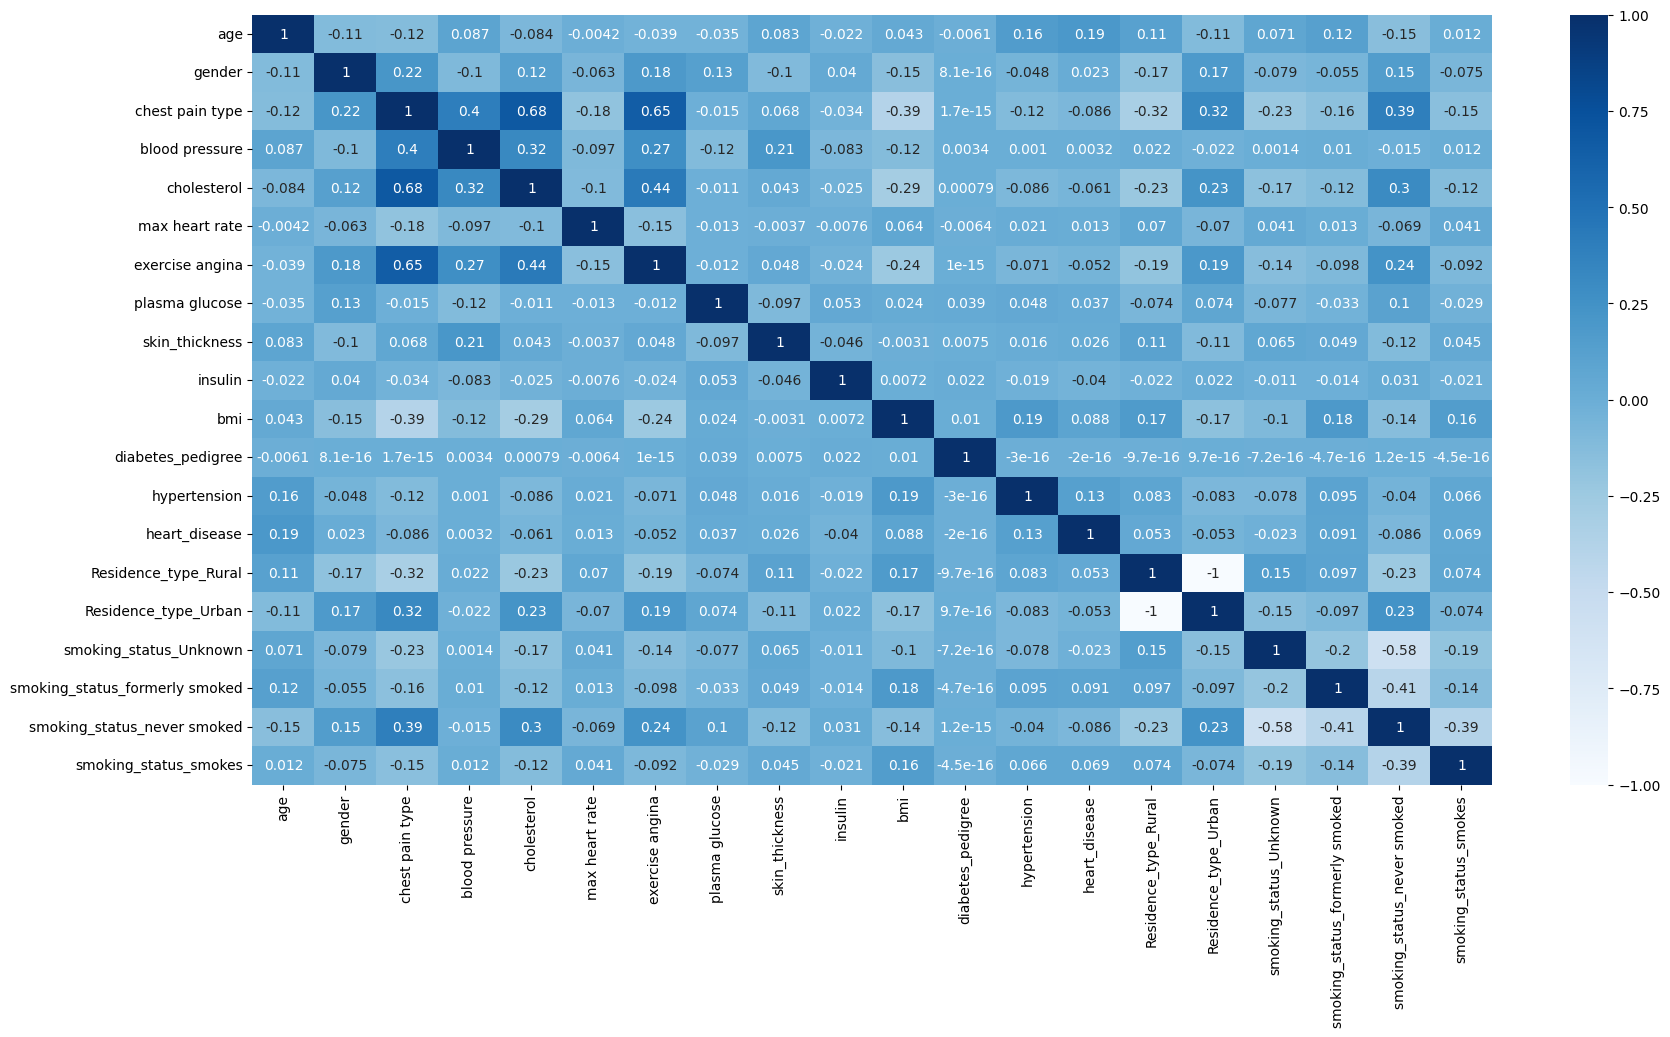

In [14]:
corr = df_encoded.corr()
plt.figure(figsize=(20,10))
heat = sns.heatmap(corr, annot=True, cmap="Blues")

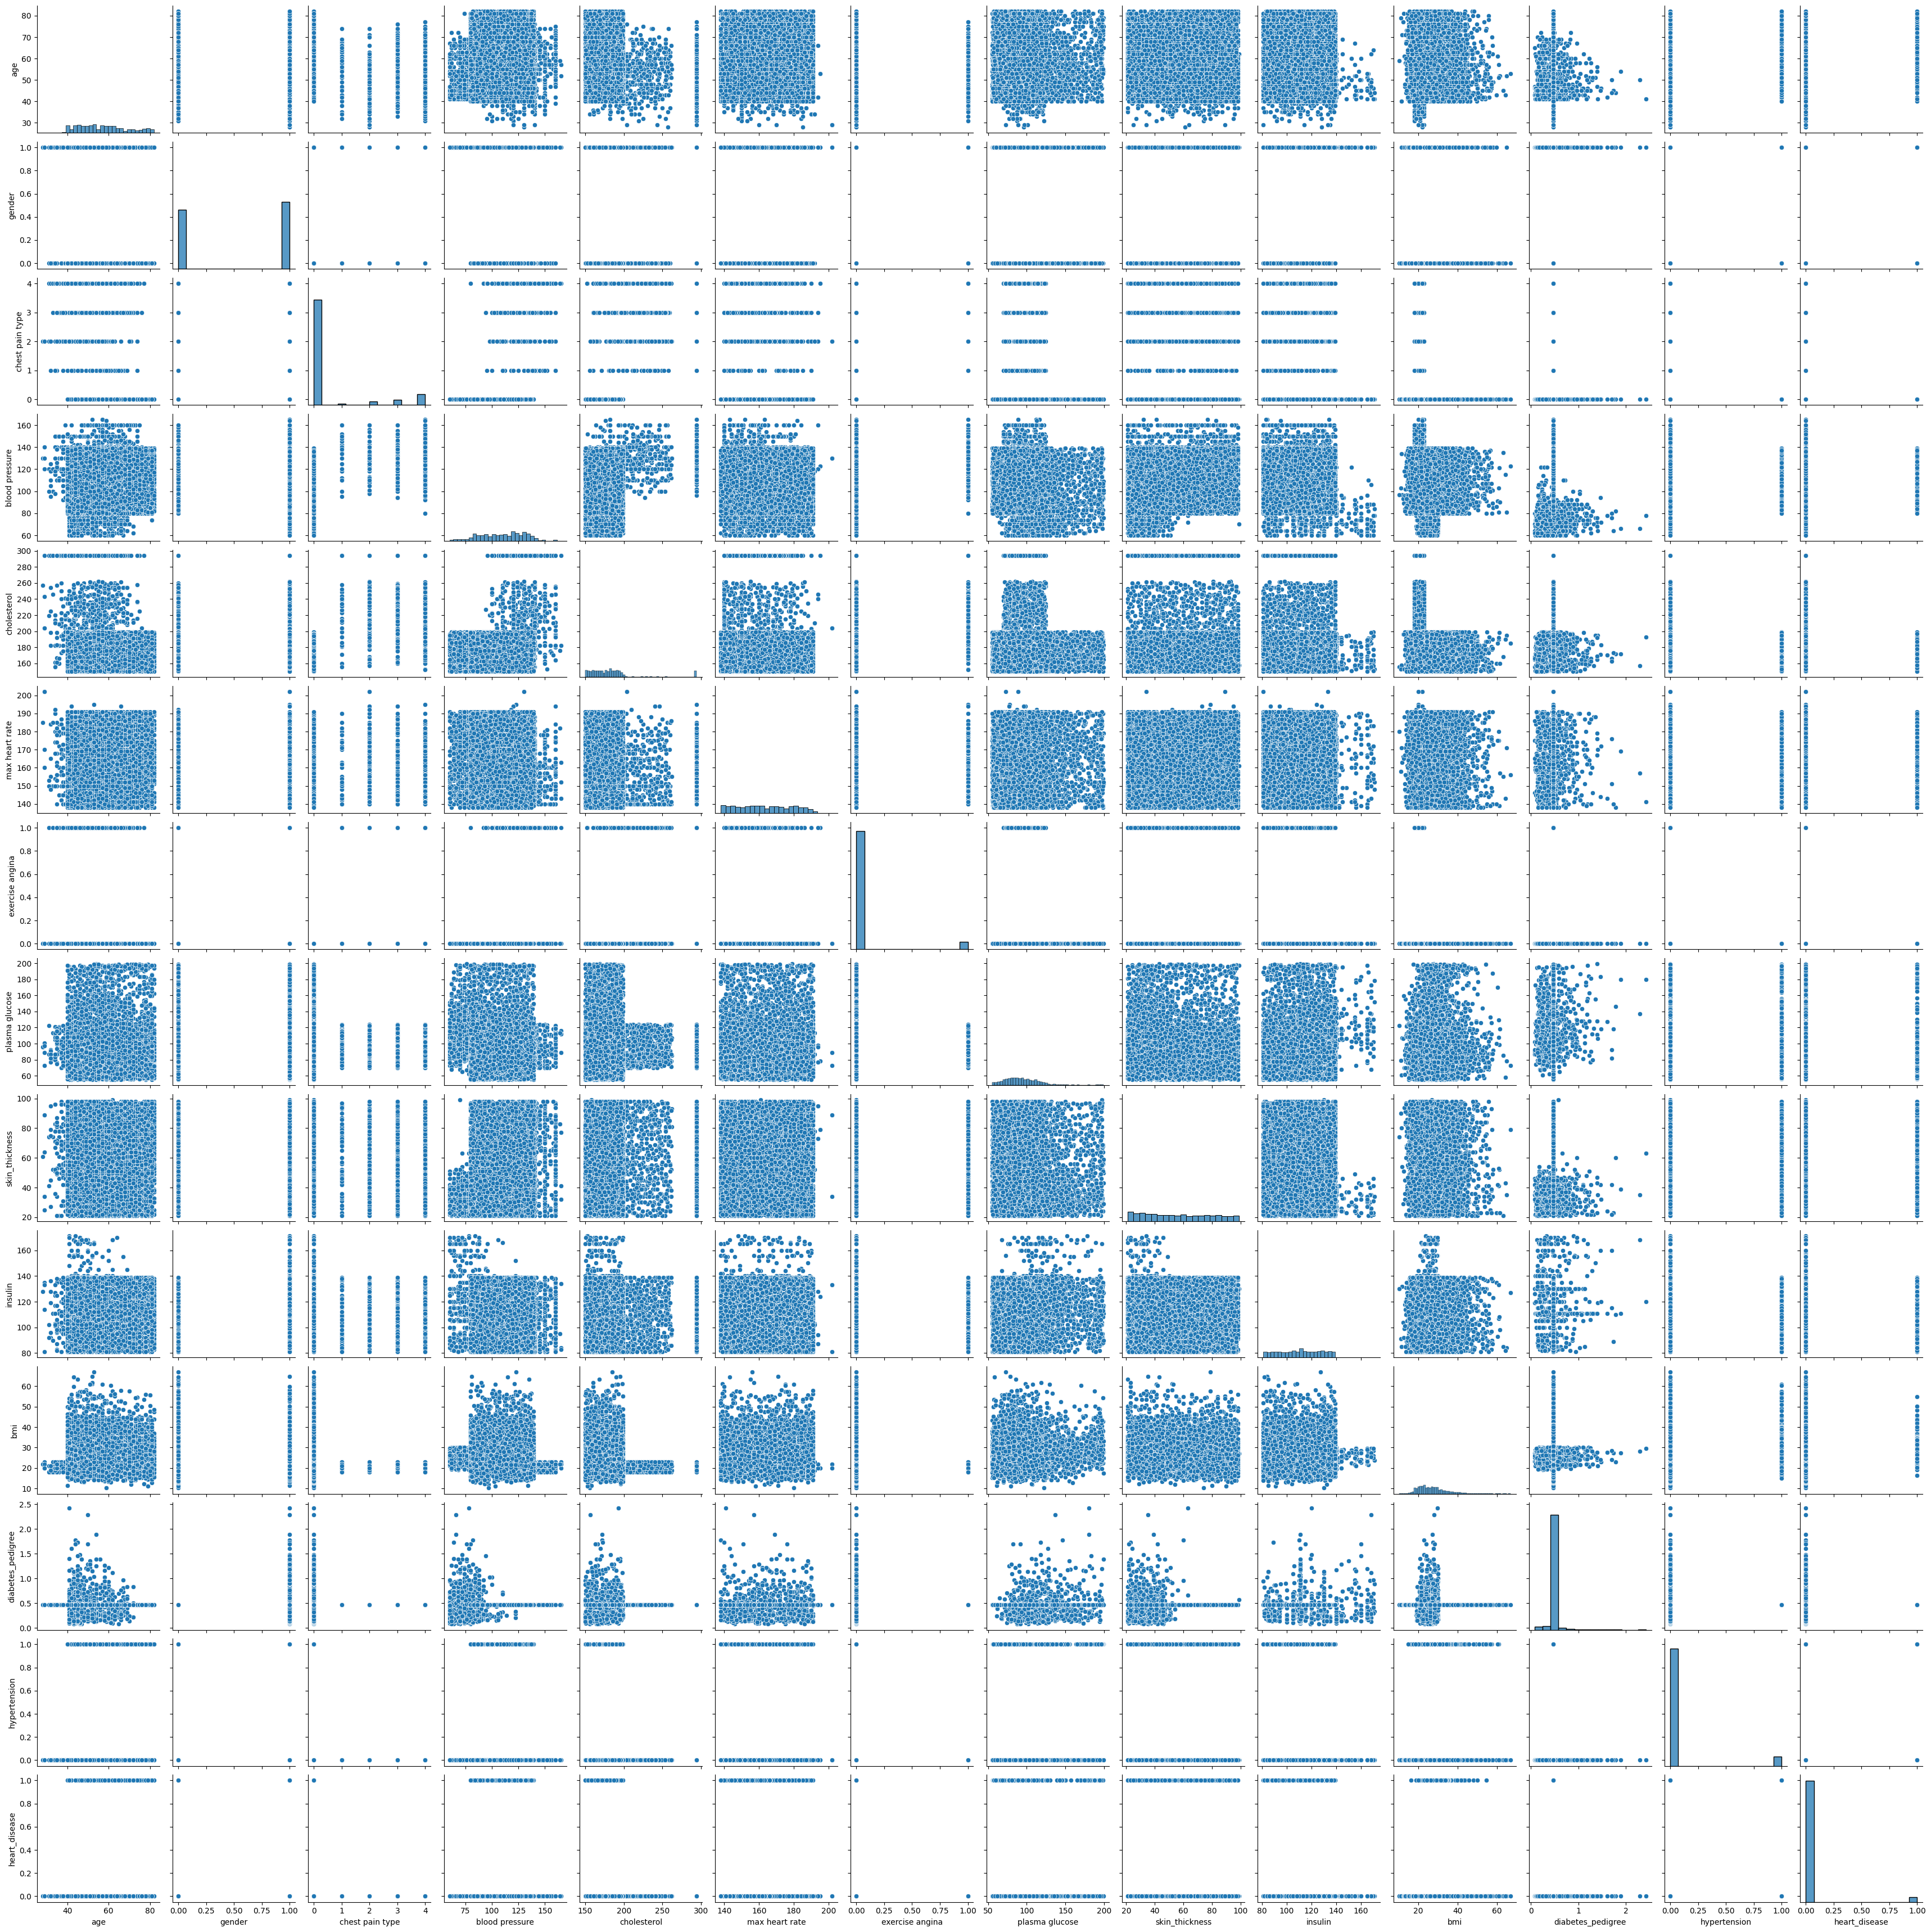

In [15]:
sns.pairplot(df)

### Summary of 1D: <br>

Heatmap: It gives an idea of the relationship between two columns and correlation values ranges from -1, 1.

Pairplot: It helps us identify the unique pattern by comparing two columns. 

# 2. Modeling

# 2A:

In [16]:
# transforming features by scaling each feature to a given range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_encoded)
pd.DataFrame(scaled_data)

0    1     2         3         4         5    6         7   \
0     0.222222  1.0  0.50  0.761905  1.000000  0.531250  0.0  0.367528   
1     0.388889  0.0  0.75  0.952381  0.208333  0.281250  0.0  0.138171   
2     0.166667  1.0  0.50  0.666667  1.000000  0.281250  0.0  0.298026   
3     0.370370  0.0  1.00  0.742857  0.444444  0.281250  1.0  0.117320   
4     0.481481  1.0  0.75  0.857143  0.312500  0.281250  0.0  0.367528   
...        ...  ...   ...       ...       ...       ...  ...       ...   
6956  0.962963  0.0  0.00  0.485714  0.020833  0.437500  0.0  0.198985   
6957  0.981481  0.0  0.00  0.600000  0.048611  0.343750  0.0  0.487073   
6958  0.981481  0.0  0.00  0.638095  0.243056  0.046875  0.0  0.193703   
6959  0.425926  1.0  0.00  0.600000  0.076389  0.375000  0.0  0.772658   
6960  0.296296  0.0  0.00  0.619048  0.180556  0.531250  0.0  0.209619   

            8         9         10        11   12   13   14   15   16   17  \
0     0.282051  0.122222  0.153982  0.166262  0.0  0.0  0.0  1.0  0.0  0.0   
1     0.333333  0.100000  0.136283  0.166262  0.0  0.0  0.0  1.0  0.0  0.0   
2     0.410256  0.233333  0.224779  0.166262  0.0  0.0  0.0  1.0  0.0  0.0   
3     0.384615  0.411111  0.136283  0.166262  0.0  0.0  0.0  1.0  0.0  0.0   
4     0.884615  0.022222  0.189381  0.166262  0.0  0.0  0.0  1.0  0.0  0.0   
...        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
6956  0.128205  0.300000  0.146903  0.166262  1.0  0.0  0.0  1.0  0.0  0.0   
6957  0.025641  0.088889  0.525664  0.166262  0.0  0.0  0.0  1.0  0.0  0.0   
6958  0.256410  0.155556  0.359292  0.166262  0.0  0.0  1.0  0.0  0.0  0.0   
6959  0.166667  0.133333  0.270796  0.166262  0.0  0.0  1.0  0.0  0.0  1.0   
6960  0.461538  0.355556  0.281416  0.166262  0.0  0.0  0.0  1.0  1.0  0.0   

       18   19  
0     1.0  0.0  
1     1.0  0.0  
2     1.0  0.0  
3     1.0  0.0  
4     1.0  0.0  
...   ...  ...  
6956  1.0  0.0  
6957  1.0  0.0  
6958  1.0  0.0  
6959  0.0  0.0  
6960  0.0  0.0  

[6961 rows x 20 columns]

# 2B:

In [17]:
# creating a list of hyperparameters
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 6, 7, 8, 9, 10]
metric_values = ['euclidean', 'manhattan']
p_values = [1, 2]

# initializing the variables
results = []
best_score = -1
best_model = None

# Creating a sampling function for the calculation
def sampling(eps_values, min_samples_values, metric_values, p_values):
    """
    This function take eps_values, min_samples_values, metric_values, p_values
    from the list created above and uses DBSCAN() to cluster the data.
    """
    global best_score, best_model
    for eps in eps_values:
        for min_samples in min_samples_values:
            for metric_value in metric_values:
                for p in p_values:
                    # using DBSCAN for clustering
                    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric_value, p=p)
                    labels = dbscan.fit_predict(scaled_data)
                    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                    
                    # calculating the silhouette score
                    if n_clusters > 1:
                        silhouette_avg = silhouette_score(scaled_data, labels)
                        if silhouette_avg > best_score:
                            best_score = silhouette_avg
                            best_model = dbscan

                    noise_points = sum(1 for label in best_model.labels_ if label == -1)
                    hyper_params = {
                        "EPS": eps,
                        "Min_Samples": min_samples,
                        "Metric": metric_value,
                        "P": p,
                        "noise": noise_points,
                        "Estimated # of Clusters": n_clusters,
                        "Silhouette Score": silhouette_avg
                    }
                    results.append(hyper_params)

sampling(eps_values, min_samples_values, metric_values, p_values)


In [18]:
# using get_params() for chosing the best hyperparameters
print(best_model.get_params())

{'algorithm': 'auto', 'eps': 2.0, 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'min_samples': 7, 'n_jobs': None, 'p': 1}


In [19]:
# tabluating the results 
new_df = pd.DataFrame(results)
new_df

EPS  Min_Samples     Metric  P  noise  Estimated # of Clusters  \
0   0.5            5  euclidean  1    489                       41   
1   0.5            5  euclidean  2    489                       41   
2   0.5            5  manhattan  1    489                       13   
3   0.5            5  manhattan  2    489                       13   
4   0.5            6  euclidean  1    566                       32   
..  ...          ...        ... ..    ...                      ...   
91  2.0            9  manhattan  2      9                        8   
92  2.0           10  euclidean  1      9                        1   
93  2.0           10  euclidean  2      9                        1   
94  2.0           10  manhattan  1      9                        8   
95  2.0           10  manhattan  2      9                        8   

    Silhouette Score  
0           0.271114  
1           0.271114  
2          -0.187248  
3          -0.187248  
4           0.272009  
..               ...  
91          0.347774  
92          0.347774  
93          0.347774  
94          0.347774  
95          0.347774  

[96 rows x 7 columns]

In [20]:
# Manually chosing the best hyperparameters
n = new_df[new_df["Silhouette Score"] > 0.3]
n

EPS  Min_Samples     Metric  P  noise  Estimated # of Clusters  \
24  1.0            5  euclidean  1     22                       56   
25  1.0            5  euclidean  2     22                       56   
28  1.0            6  euclidean  1     22                       54   
29  1.0            6  euclidean  2     22                       54   
32  1.0            7  euclidean  1     22                       51   
33  1.0            7  euclidean  2     22                       51   
36  1.0            8  euclidean  1     22                       50   
37  1.0            8  euclidean  2     22                       50   
40  1.0            9  euclidean  1     22                       47   
41  1.0            9  euclidean  2     22                       47   
44  1.0           10  euclidean  1     22                       45   
45  1.0           10  euclidean  2     22                       45   
74  2.0            5  manhattan  1      6                        8   
75  2.0            5  manhattan  2      6                        8   
76  2.0            6  euclidean  1      6                        1   
77  2.0            6  euclidean  2      6                        1   
78  2.0            6  manhattan  1      6                        8   
79  2.0            6  manhattan  2      6                        8   
80  2.0            7  euclidean  1      6                        1   
81  2.0            7  euclidean  2      6                        1   
82  2.0            7  manhattan  1      9                        8   
83  2.0            7  manhattan  2      9                        8   
84  2.0            8  euclidean  1      9                        1   
85  2.0            8  euclidean  2      9                        1   
86  2.0            8  manhattan  1      9                        8   
87  2.0            8  manhattan  2      9                        8   
88  2.0            9  euclidean  1      9                        1   
89  2.0            9  euclidean  2      9                        1   
90  2.0            9  manhattan  1      9                        8   
91  2.0            9  manhattan  2      9                        8   
92  2.0           10  euclidean  1      9                        1   
93  2.0           10  euclidean  2      9                        1   
94  2.0           10  manhattan  1      9                        8   
95  2.0           10  manhattan  2      9                        8   

    Silhouette Score  
24          0.339563  
25          0.339563  
28          0.338595  
29          0.338595  
32          0.336757  
33          0.336757  
36          0.336491  
37          0.336491  
40          0.334457  
41          0.334457  
44          0.332642  
45          0.332642  
74          0.347709  
75          0.347709  
76          0.347709  
77          0.347709  
78          0.347709  
79          0.347709  
80          0.347709  
81          0.347709  
82          0.347774  
83          0.347774  
84          0.347774  
85          0.347774  
86          0.347774  
87          0.347774  
88          0.347774  
89          0.347774  
90          0.347774  
91          0.347774  
92          0.347774  
93          0.347774  
94          0.347774  
95          0.347774

# 2D: Choosing the best model

In this case I decided to choose the hyperparameters manually because the hyperparameters generated .get_params() were giving me wrong clustering and giving me a hard time in the following questions; 3A and 3B. <br>

The best model hyperparameters are: (row 87)<br>
eps: 2.0 <br>
min_sample: 8 <br>
metrics: manhattan <br>
p_value: 2<br>
noise: 9<br>
Estimated # of Clusters: 8<br>
Silhouette score: 0.347774<br>

I chose this model because estimated # number of clusters were exactly the same as the chosen min_sample and the noise were only of 9 points which is the pretty good.

# 3. Conclusion

# 3A.

In [21]:
df.columns

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type', 'smoking_status'],
      dtype='object')

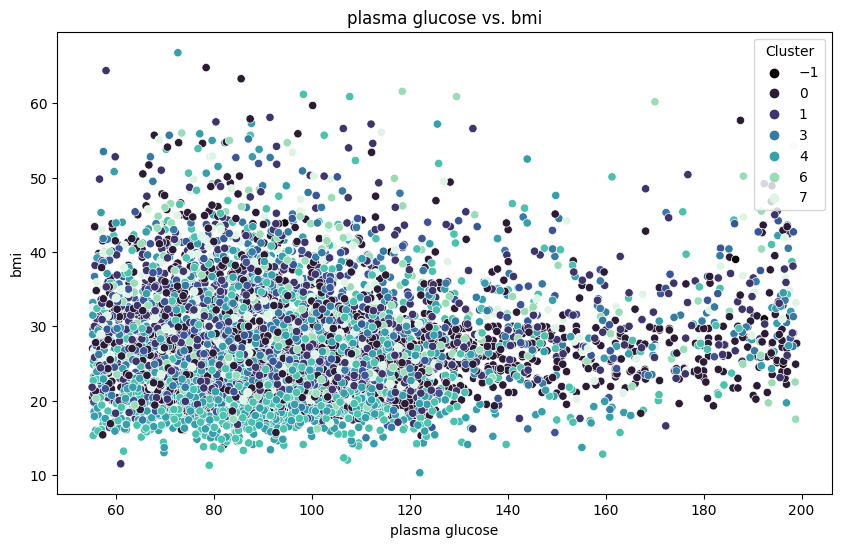

In [22]:
# Using the best DBSCAN model to predict cluster labels
al = DBSCAN(eps=2.0, min_samples=8, metric="manhattan", p=2)
cluster_labels = al.fit_predict(scaled_data)

# choosing the columns
x_col = 'plasma glucose'
y_col = 'bmi'

# Creating a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[x_col], y=df[y_col], hue=cluster_labels, palette="mako")
plt.title(f'{x_col} vs. {y_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(title='Cluster')
plt.show()

### Summary of 3A
Choosing the columns: 
I chose Plasma glucose vs Bmi chart because 'Plasma glucose' and 'BMI' are related as health indicators and can be associated when assessing the risk of conditions like diabetes and metabolic disorders. BMI will help us if the person is Obese or not. If a person is obese and plasma glucose level is high they might be suffering from diabetes and will be at high risk.

Observations: Total 8 clusters were created. The correlation between those two columns was 0.024 (2.4%) which is quite low. The scatter plot is widely spread and most of the datapoints lie in cluster 0.

# 3B.

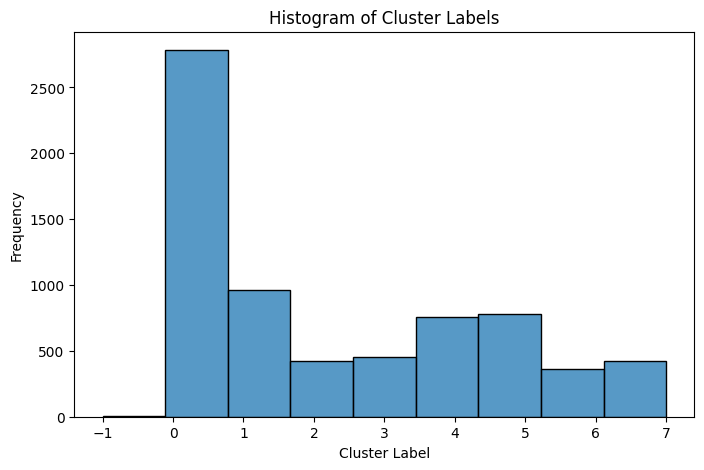

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(cluster_labels, bins=len(set(cluster_labels)))
plt.title('Histogram of Cluster Labels')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

### Summary 3B:

Observation: It will help us determine the number patients are in each cluster.  I used the best model in order to predict the clusters and total 8 clusters were created. Most of the data points are in cluster 0. Cluster 0 has over 2500 people. 

-1 is an outlier. In other words, it is noise.

# 3C.

In [32]:
# Creating a separate dataframes for each cluster and using .describe() to describe the them
for cluster_label in range(8):
    new_cluster_df = df[cluster_labels == cluster_label]
    print(f"Cluster {cluster_label} Description:")
    print(pd.DataFrame(new_cluster_df).describe())
    print("\n")

Cluster 0 Description:
               age       gender  chest pain type  blood pressure  cholesterol  \
count  2784.000000  2784.000000      2784.000000     2784.000000  2784.000000   
mean     54.511135     0.682830         1.322917      109.094828   200.117816   
std      10.743166     0.465458         1.697443       26.549941    43.013361   
min      28.000000     0.000000         0.000000       60.000000   150.000000   
25%      46.000000     0.000000         0.000000       85.000000   170.000000   
50%      54.000000     1.000000         0.000000      112.500000   186.000000   
75%      61.000000     1.000000         3.000000      130.000000   218.250000   
max      82.000000     1.000000         4.000000      165.000000   294.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count     2784.000000      2784.000000     2784.000000     2784.000000   
mean       161.536279         0.154454      102.835614       52.455460   
std         15.165234    

# Conclusion:

### DataFrame Observation:  
By monitoring and managing these measurements, we would be able to determine if they are should be taken to the ER.
 
Rank 1 is not as serious and 5 being very serious. <br>
Rank Scale 1 - 5


Rank     \\   Cluster <br>
5       \\      0 <br>
4       \\      1 <br>
4       \\      5 <br>
4       \\      4 <br>
3       \\      3 <br>
3       \\      2 <br>
2       \\      7 <br>
1       \\      6 <br>

I ranked cluster 0 as very serious (i.e. 5) because a lot of people fall into that cluster and patients have a plasma glucose level around 199 and body mass index is quite high. 

### Description of each cluster: 

### Cluster 0:
The total cluster size is 2784, with the mean age of 54.5. Most of the patients have type 1 chest pain.  Mean maximum heart rate is approximately 161.54, with values ranging from 138 bpm to 202 bpm. Mean plasma glucose level is approximately 102.84, ranging from 55.22 to 199.

This cluster is at # 5 beacuse these group of people are at high risk and need to be taken to the ER asap and needs some serious attention.

### Cluster 1:
The size of cluster is 960 which, with the mean age of 59.6. Here we can tell that there are reletively old people in this cluster compared to cluster 0. The mean blood pressure is 109 with 80 min and max of 139 which is a little bit over normal blood pressure. 

This cluster is ranked at # 4 because the sample size is small yet important and need to be take to ER.

### Cluster 2: 
The size of cluster is 422. With the mean age of 57.5. All patients have type 0 chest pain. Mean blood pressure is around 109.25 which is okay. Mean plasma glucose level is approximately 95.58. Approximately, 7.1% of the sample has heart disease.

This cluster is ranked at # 4 because of the sample is small yet important and need to be taken to ER. 

### Cluster 3:
The size of cluster 456, with the mean age of 61.9. All patients have type 0 chest pain. All patients have no exercise-induced angina. Mean plasma glucose level is approximately 96.41. Mean BMI is approximately 29.97.

This cluster is ranked at # 3 because they seems less serious than other cluster and most of them dont have chest pain or exercise-induced angina.

### Cluster 4:
The cluster size is 759, with the mean age of 58.5. All patients have type 0 chest pain. Mean blood pressure recorded is around 110.49 mm Hg, ranging from 80 mm Hg to 139.  All patients have no exercise-induced angina. Mean plasma glucose level is approximately 94.34, ranging from 55.23 to 197.79.

This cluster is ranked at # 4 because the cluster size is high and needs some seious attention. 

### Cluster 5:
The cluster size is 782, with the mean age of 59.5. All patients have type 0 chest pain. All patients have no exercise-induced angina. BMI is approximately 25.95.

This cluster is ranked at # 4 because the cluster size is high and needs some seious attention.

### Cluster 6:
The cluster size is 363, with the mean age of 58. All patients have type 0 chest pain. All patients have no exercise-induced angina. Mean BMI is approximately 30.77. Mean plasma glucose level is approximately 96.30, ranging from 55.93 to 198.79.

This cluster is ranked at # 1 because the sample size is small and there are other groups that needs more attention. 

### Cluster 7:
The cluster size is 426, with the mean age of 60.6. Mean cholesterol level is approximately 174.52, ranging from 150 to 199. Mean BMI is approximately 30.97.

This cluster is ranked at # 2 beacuse the sample size is small and there are others groups that need more attention. 